<a href="https://colab.research.google.com/github/dhwlxor/My-Ropo/blob/main/%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving x.png to x (1).png
✅ 모델 로드 완료
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


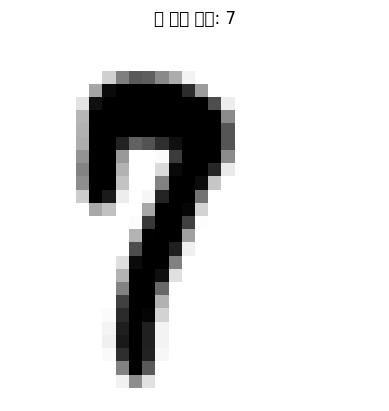

In [2]:
!pip install ipycanvas ipywidgets

import numpy as np
import tensorflow as tf
from ipycanvas import Canvas
from ipywidgets import Button, VBox, Output
from IPython.display import display
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()  # mnist_cnn_model.h5 선택

model = tf.keras.models.load_model('2mnist_cnn_model.h5')
print("✅ 모델 로드 완료")


# 숫자 인식 함수
def recognize_digit():
    data = canvas.get_image_data(0, 0, 280, 280)
    img = np.array(data.data)[::4].reshape((280, 280))  # R 채널만 추출
    img = 1 - (img / 255.0)                             # 색 반전 및 정규화
    img = tf.image.resize(img[..., np.newaxis], (28, 28))  # 28x28 크기로
    img = img.numpy().reshape(1, 28, 28, 1)             # 배치 차원 추가

    pred = model.predict(img)
    pred_label = np.argmax(pred)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"📢 예측 숫자: {pred_label}")
    plt.axis('off')
    plt.show()

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로딩 및 전처리
img = Image.open('x.png').convert('L')  # 흑백 변환
img = img.resize((28, 28))              # MNIST 크기 맞춤
img_array = np.array(img)

# 이미지 반전 및 정규화
img_array = 255 - img_array             # 흰 바탕, 검은 글씨로
img_array = img_array / 255.0           # 정규화
img_array = img_array.reshape(1, 28, 28, 1)  # CNN 입력 형태

# 예측
pred = model.predict(img_array)
pred_label = np.argmax(pred)

# 결과 출력
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'📢 예측 숫자: {pred_label}')
plt.show()
